In [166]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.linalg as la
from pandas.plotting import table 

Read In Data

In [167]:
Data_File = open('Admissions.txt','r') #open the file contents
Data_String = Data_File.read() # read the contents into a string
full_data = Data_String.splitlines()# storing each datapoint into a list
random.shuffle(full_data) # for random sampling of training, validation and testing data

Analysing and processing the Data
First we will remove our first column

In [168]:
new_full_data = []
for i in range(len(full_data)): # removing the first column from the full data
    list = full_data[i].split(",")
    list.pop(0)
    str = ""
    for i in range(len(list)):
        str = str + list[i] 
        if(i < (len(list)-1)):
            str = str + ","
    list = []
    new_full_data.append(str)
def normalise(thresh, changer):
    data_adjust = [] # to store the new adjusted data
    for i in range(len(new_full_data)): # normalising our targets from being continuos to being either 0 or 1 with 0.5 as the threshold
        list = new_full_data[i].split(",")
        Chance = list[-1] 
        if(changer == 1):
            if(float(Chance) > thresh):  # the deciding value/ threshold is 'thresh'
                Chance = "1"
            else:
                Chance = "0"
            list[-1] = Chance
            str = ""
            for i in range(len(list)):
                str = str + list[i] 
                if(i < (len(list)-1)):
                    str = str + ","
            list = []
            str = str.split(",")
            data_adjust.append(str)  # new adusted data is stored in data_adjust
        else:
            if(float(Chance) > 0):  # the deciding value/ threshold is 'thresh'
                Chance = Chance
            else:
                Chance = Chance
            list[-1] = Chance
            str = ""
            for i in range(len(list)):
                str = str + list[i] 
                if(i < (len(list)-1)):
                    str = str + ","
            list = []
            str = str.split(",")
        #     str = np.array(str)
            data_adjust.append(str)  # new adusted data is stored in data_adjust
            
    return data_adjust
    

DIVIDING THE DATA

240 data points- Training data.

80 data points- Validation data.

80 data points- Test data.

In [169]:
data_adjust = normalise(0.65, 0)
training_datax =  data_adjust[:240]
validation_datax = data_adjust[240:320]
test_datax = data_adjust[320:400]

# Labels

data_adjust = np.array(data_adjust)

test_datay = data_adjust[320:400][:,7]
training_datay =  data_adjust[:240][:,7]
validation_datay = data_adjust[240:320][:,7]

In [170]:
test_datax = np.array(test_datax)
training_datax = np.array(training_datax)
validation_datax = np.array(validation_datax)

test_datax= test_datax.astype(float)
training_datax= training_datax.astype(float)
validation_datax= validation_datax.astype(float)

test_dx = np.delete(test_datax, 7, 1)
training_dx = np.delete(training_datax, 7, 1)
validation_dx = np.delete(validation_datax, 7, 1)

In [171]:
print(training_datax.shape)
print(training_datay.shape)

(240, 8)
(240,)


CORRELATION HEATMAP BETWEEN ALL VARIABLES

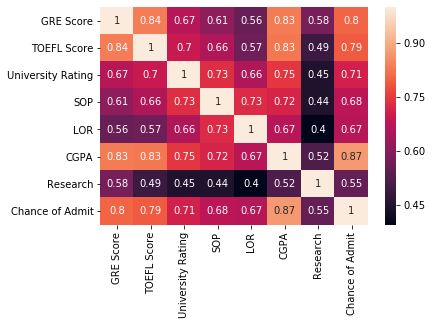

In [172]:
def heatmap(data):
    data= data.astype(float)
    df = pd.DataFrame(data)
    c = df.corr()
    data_corr = c
    x = ["GRE Score", "TOEFL Score", "University Rating","SOP", "LOR", "CGPA", "Research", "Chance of Admit"]
    y = ["GRE Score", "TOEFL Score", "University Rating","SOP", "LOR", "CGPA", "Research", "Chance of Admit"]
    sns.heatmap(data_corr, xticklabels=x, yticklabels=y, annot = True )
    return data, c
data,corr = heatmap(data_adjust)

 The correlation between University Rating and Chance of admission is 0.9997699766763158, which is significantly high but is the lowest correlation compared to all other correlations with independent variables and the dependent variable (Chance of Admission)

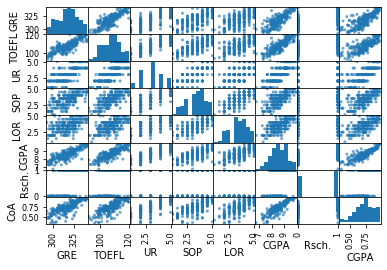

In [173]:
def ScatterPlot(Datax, Datay):
#     mean = np.mean(Datax, axis= 0)
    dtx = pd.DataFrame(Datax)
    dty = pd.DataFrame(Datay)
    dtx_corr = dtx.corr()
    const = np.ones(len(Datax))
    const = pd.DataFrame(const)
    dtx.columns = ["GRE", "TOEFL", "UR","SOP", "LOR", "CGPA", "Rsch.", "CoA"]
    pd.plotting.scatter_matrix(dtx, alpha=0.65)
    x = dtx["CGPA"]
    y = dtx["CoA"]
    x = np.array(x)
    y = np.array(y)
    N=len(dtx)
    colors = np.zeros(N)
    area = np.pi*3
    plt.scatter(x,y, s = area,c = colors, alpha= 0.5)
    plt.xlabel('CGPA')
    plt.ylabel('Chance of Admission')
    return x

Tx = ScatterPlot(training_datax, training_datay)


In [174]:
data_adjust_normalised = normalise(0.5, 0)
training_datax =  data_adjust_normalised[:240]
validation_datax = data_adjust_normalised[240:320]
test_datax = data_adjust_normalised[320:400]

# Labels

data_adjust_normalised = np.array(data_adjust_normalised)

test_datay = data_adjust_normalised[320:400][:,7]
training_datay =  data_adjust_normalised[:240][:,7]
validation_datay = data_adjust_normalised[240:320][:,7]

In [175]:
test_datax = np.array(test_datax)
training_datax = np.array(training_datax)
validation_datax = np.array(validation_datax)

test_datax= test_datax.astype(float)
training_datax= training_datax.astype(float)
validation_datax= validation_datax.astype(float)

test_dx = np.delete(test_datax, 7, 1)
training_dx = np.delete(training_datax, 7, 1)
validation_dx = np.delete(validation_datax, 7, 1)

test_datay= test_datay.astype(float)
training_datay= training_datay.astype(float)
validation_datay= validation_datay.astype(float)

74
1
5
0


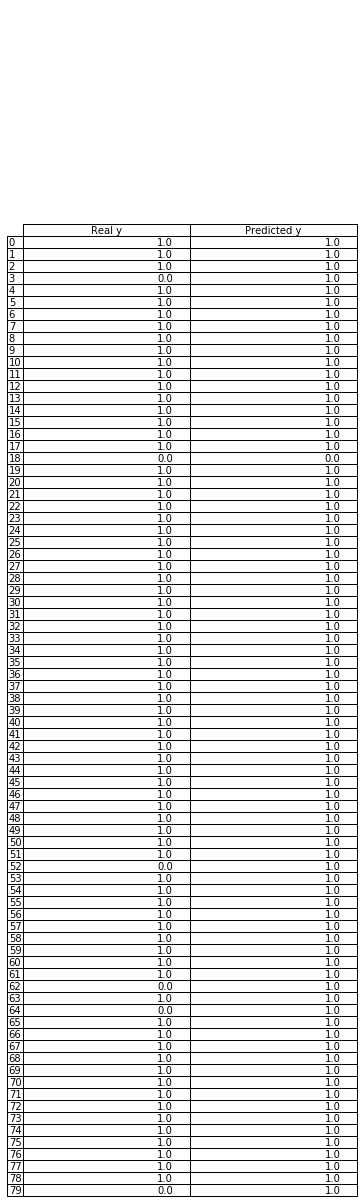

In [176]:
def Error(y, y_pred):
    return y - y_pred

def y_hat(X, B):
    return np.matmul(X, B)

def Beta_hat(X, y):
    X_T = X.T
    A = np.matmul(X_T, X)
    A_inv = np.linalg.inv(A)
    B = np.matmul(X_T, y)
    Beta = np.matmul(A_inv, B)
    return Beta
    
def LinReg(X, Y):
    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)
    const = np.ones(len(X))
    const = pd.DataFrame(const)
    X = pd.concat([const, X], axis = 1)
    X = np.matrix(X)
    Y = np.matrix(Y)
    beta_h = Beta_hat(X,Y)
    train_pred_y = pd.DataFrame(Y)
    train_pred_y = np.array(train_pred_y)
    
    
    return train_pred_y, beta_h

def test_model(X, beta):
    X = pd.DataFrame(X)
    const = np.ones(len(X))
    const = pd.DataFrame(const)
    X = pd.concat([const, X], axis = 1)
    X = np.matrix(X)
    LR = y_hat(X, beta)
    return LR

train_pred_y, betas = LinReg(training_dx, training_datay)  # Training the model with training data

# This is where we can check the accuracy of the predictions when given test or validation data
lr = test_model(test_dx, betas)
# print(train_dx.shape)
y = test_datay

# This is where we can check the accuracy of the predictions when given test or validation data


lr = pd.DataFrame(lr)
y = pd.DataFrame(y)



compare = pd.concat([y, lr], axis = 1)
compare = np.matrix(compare)


y = np.array(y)
lr = np.array(lr)


def norm(y, thresh):
    for i in range(len(y)):
        if (y[i][0] > thresh):
            y[i] = 1
        else:
            y[i] = 0
    return y

y = norm(y , 0.5)
lr = norm(lr, 0.5)
# print(y)

true_ones = 0
true_zeros = 0

false_ones =0
false_zeros = 0
# lis = []
for i in range(len(y)):
    if( y[i][0] == lr[i][0] ==  1):
        true_ones = true_ones + 1
    elif(y[i][0] == lr[i][0] ==  0):
        true_zeros = true_zeros + 1
    elif(y[i][0] == 0 and lr[i][0] == 1):
        false_ones = false_ones + 1
    elif(y[i][0] == 1 and lr[i][0] ==  0):
        false_zeros = false_zeros + 1
        
print(true_ones)
print(true_zeros)
print(false_ones)
print(false_zeros)


lr = pd.DataFrame(lr)
y = pd.DataFrame(y)
compare2 = pd.concat([y, lr], axis = 1)
# compare2 = np.matrix(compare2)
compare2.columns = ["Real y", "Predicted y"]
# print(compare2)

ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)

table(ax, compare2)
# plt.savefig("Testing_Data_Results.pdf", bbox_inches="tight", pad_inches=1)
 

Accuracy
0.9375
Mean Square Error
0.0625
Confusion Matrix


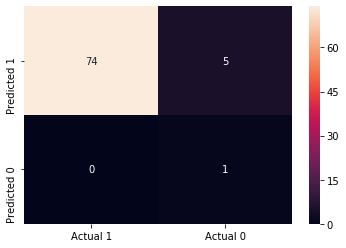

In [177]:
lis = [[true_ones, false_ones], [false_zeros, true_zeros]]
CM = np.matrix(lis)
Acc = (true_ones + true_zeros)/ (true_ones +true_zeros+ false_ones +false_zeros)
print("Accuracy")
print(Acc)
e = Error(y, lr)
def CMatrix(data):
#     plt.matshow(data);
#     plt.colorbar() 
#     for (x, y), value in np.ndenumerate(data):
#         plt.text(x, y, f"{value:.2f}", va="center", ha="center")
    plt.show()
    df = pd.DataFrame(data)
    x = ["Actual 1", "Actual 0"]
    y = ["Predicted 1", "Predicted 0"]
    sns.heatmap(data, xticklabels=x, yticklabels=y, annot = True )
  
CMatrix(CM)
e = np.array(e)
e = np.square(e)
e = np.sum(e)
print("Mean Square Error")
print(e/len(test_dx))
print("Confusion Matrix")  